In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

plt.scatter(X[y==0,0], X[y==0,1],color="red")
plt.scatter(X[y==1,0], X[y==1,1],color="blue")
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
from ML.LogisticRegression import LogisticRegression
from ML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))
print(log_reg.predict_proba(X_test))

1.0
[0.92972035 0.98664939 0.14852024 0.01685947 0.0369836  0.0186637
 0.04936918 0.99669244 0.97993941 0.74524655 0.04473194 0.00339285
 0.26131273 0.0369836  0.84192923 0.79892262 0.82890209 0.32358166
 0.06535323 0.20735334]


In [4]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [5]:
log_reg.interception_

-0.6937719272911225

In [6]:
log_reg._theta

array([-0.69377193,  3.01796521, -5.04447145])

# 决策边界

In [7]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

In [8]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

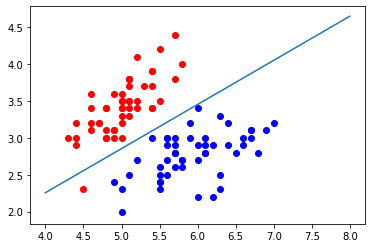

In [9]:
plt.scatter(X[y==0,0], X[y==0,1],color="red")
plt.scatter(X[y==1,0], X[y==1,1],color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

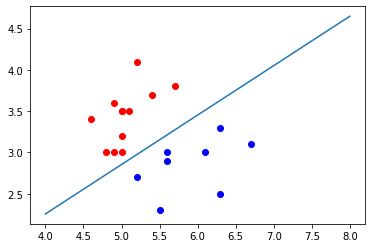

In [10]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1],color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1],color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

# 定义绘制不规则决策边界的函数

In [11]:
# def plot_decision_boundary(model, axis):
#     x0, x1 = np.meshgrid(
#         np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100))
#         np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
#     )
#     X_new = np.c_[x0.ravel(), x1.ravel()]
    
#     y_predict = model.predict(X_new)
#     zz = y_predict.reshape(x0.shape)
    
#     from matplotlib.colors import ListedColormap
#     custom_cmap = ListedColormap("#EF9A9A", "#FFF59D", "#90CAF9")
#     plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

from matplotlib.colors import ListedColormap

def plot_decision_region(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == c1, 0],
            y=X[y == c1, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=c1,
            edgecolors="black"
        )

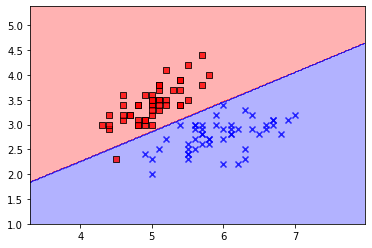

In [12]:
plot_decision_region(X, y, log_reg)

# 使用KNN算法进行分类

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

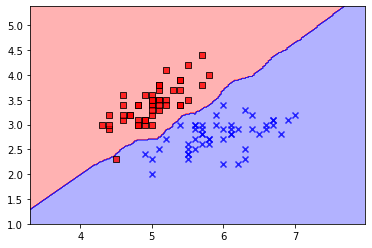

In [14]:
plot_decision_region(X, y, knn_clf)

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[:, :2]

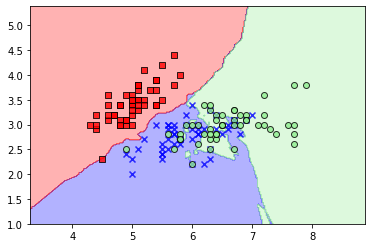

In [19]:
## 使用多个特征
knn_clf = KNeighborsClassifier()
knn_clf.fit(X, y)
plot_decision_region(X, y, knn_clf)

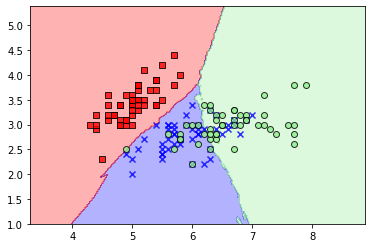

In [20]:
# 选择不同的K值
knn_clf = KNeighborsClassifier(n_neighbors=50)
knn_clf.fit(X, y)
plot_decision_region(X, y, knn_clf)